<a href="https://colab.research.google.com/github/phat1505/Health-Classifition/blob/main/Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import sklearn
import plotly.express as ex
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Đọc dữ liệu từ tệp CSV 'health_classification.csv' và hiển thị 5 dòng đầu tiên của DataFrame
df = pd.read_csv("/content/health_classification.csv")
df.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184


In [3]:
# In ra thông tin tổng quan của DataFrame 'df', bao gồm thông tin về cột và kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
# Kiểm tra và in ra số lượng giá trị thiếu (NaN) trong từng cột của DataFrame 'df'
df.isna().sum()

In [ ]:
# Hiển thị các thống kê mô tả cơ bản (mean, min, max, etc.) cho các cột có giá trị số
df.describe()

In [ ]:
# Hiển thị hình dạng của DataFrame 'df', tức số dòng và số cột
df.shape

In [5]:
# Xác định các cột phân loại để thực hiện visualizations và thống kê
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

<ipython-input-6-545f7bf5f648>:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND ACUTE}) missing from current font.



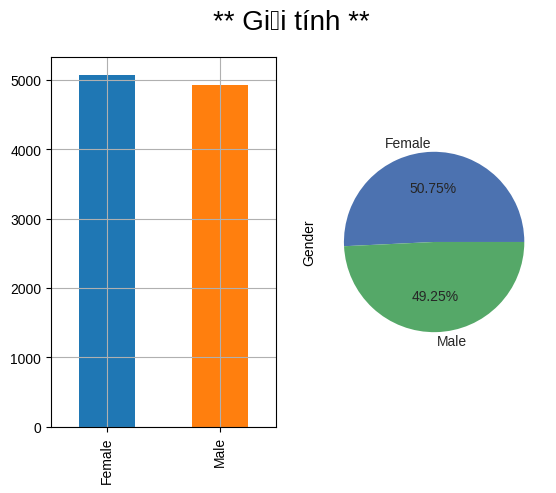

<ipython-input-6-545f7bf5f648>:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



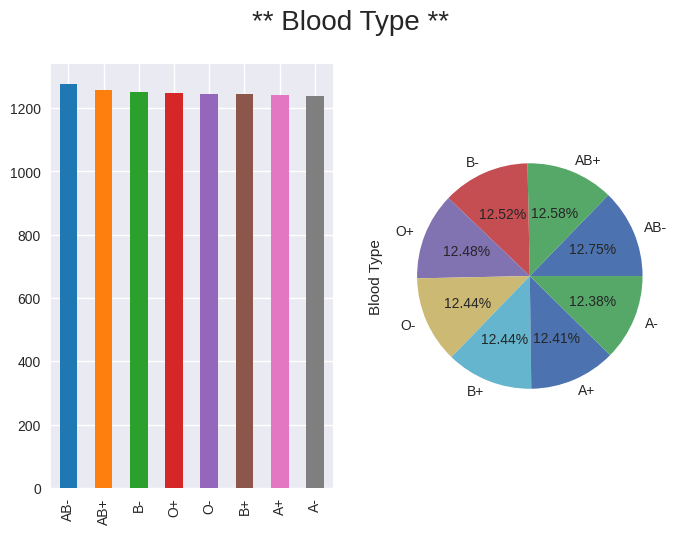

<ipython-input-6-545f7bf5f648>:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



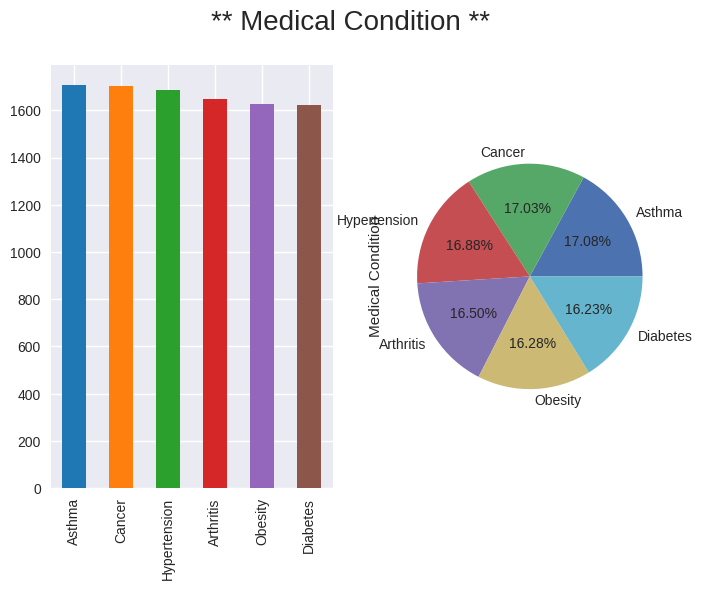

<ipython-input-6-545f7bf5f648>:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



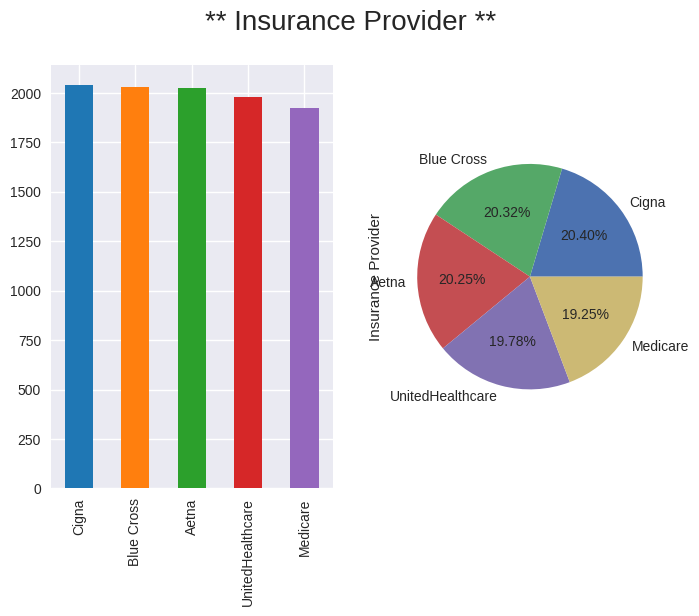

<ipython-input-6-545f7bf5f648>:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



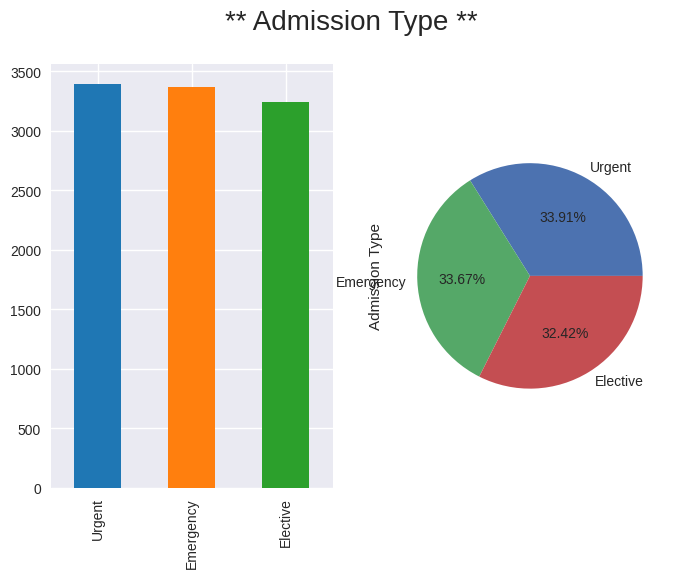

<ipython-input-6-545f7bf5f648>:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



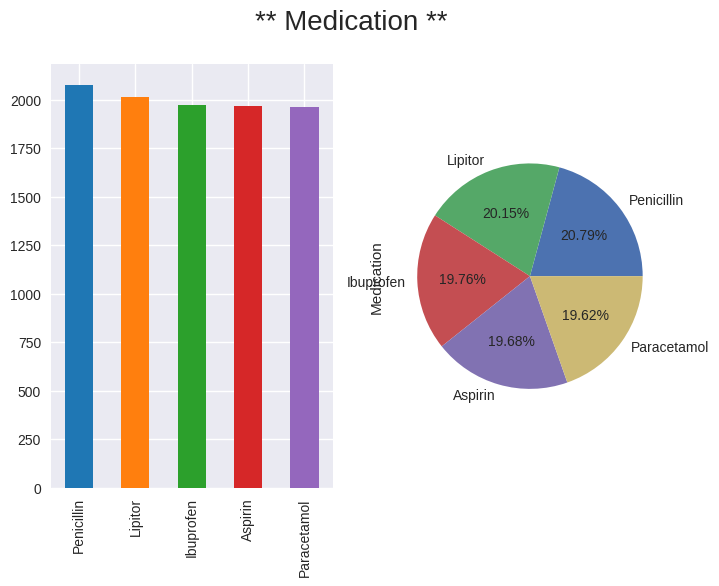

<ipython-input-6-545f7bf5f648>:19: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



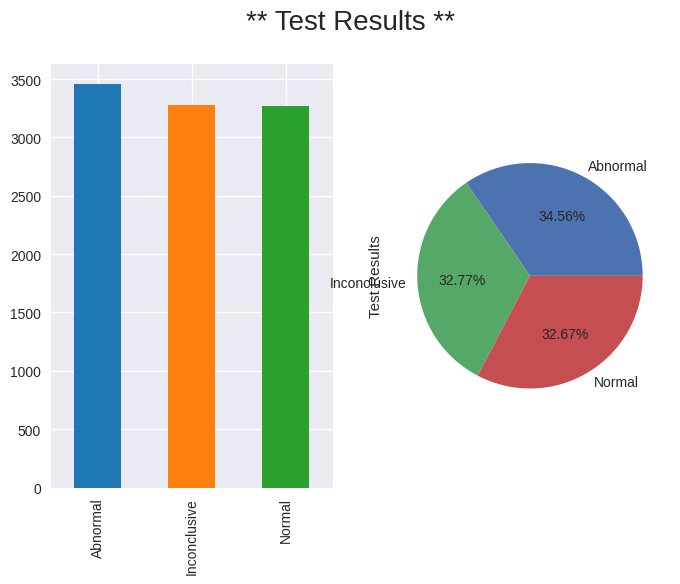

In [6]:
# Đối với các đặc trưng phân loại
for i in cols:

    if i == 'Gender':
        # Vẽ đồ thị cho đặc trưng 'Gender'
        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** Giới tính **', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

    else:
        # Vẽ đồ thị cho các đặc trưng khác
        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** ' + i + ' **', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

<ipython-input-7-3f3c689fb8c2>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




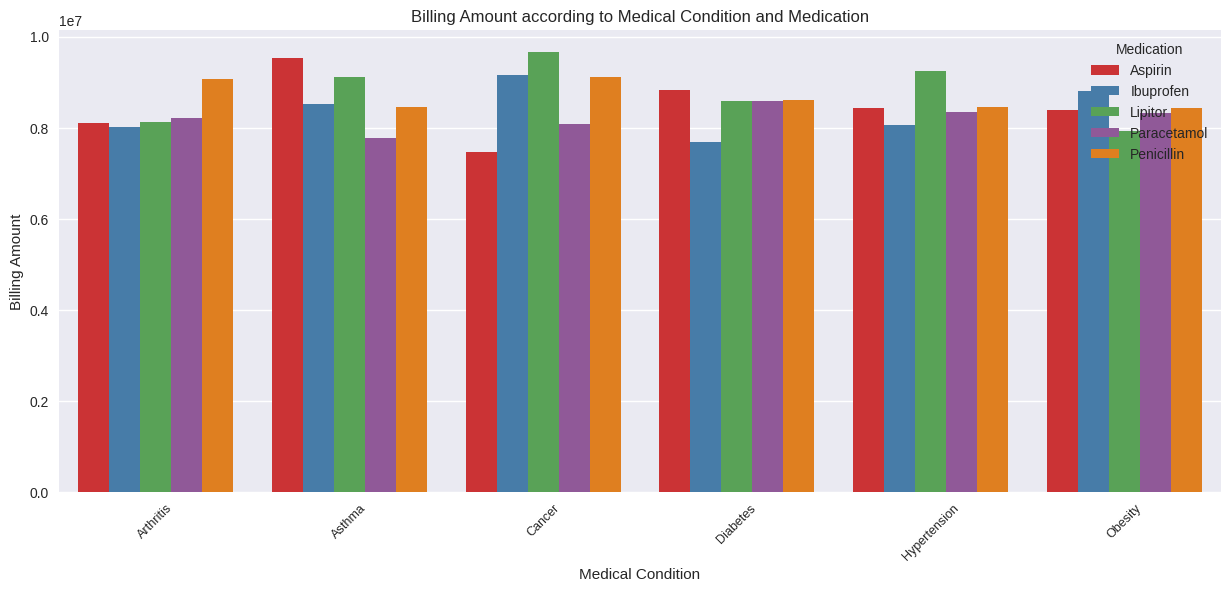

In [7]:
# Tạo DataFrame mới bằng cách nhóm dữ liệu theo cặp cột 'Medical Condition' và 'Medication',
# tính tổng 'Billing Amount' trong mỗi nhóm và reset index
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

# Tạo biểu đồ cột thể hiện 'Billing Amount' theo 'Medical Condition' và 'Medication',
# sử dụng màu sắc khác nhau cho từng giá trị trong 'Medication'
plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
# Đặt tiêu đề biểu đồ
plt.title("Billing Amount according to Medical Condition and Medication")
# Đặt tên trục y
plt.ylabel("Billing Amount")
# Xoay nhãn trục x và đặt kích thước font
plt.xticks(rotation=45, fontsize=9)
# Hiển thị biểu đồ
plt.show()

<ipython-input-8-6a9910fb3c4c>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




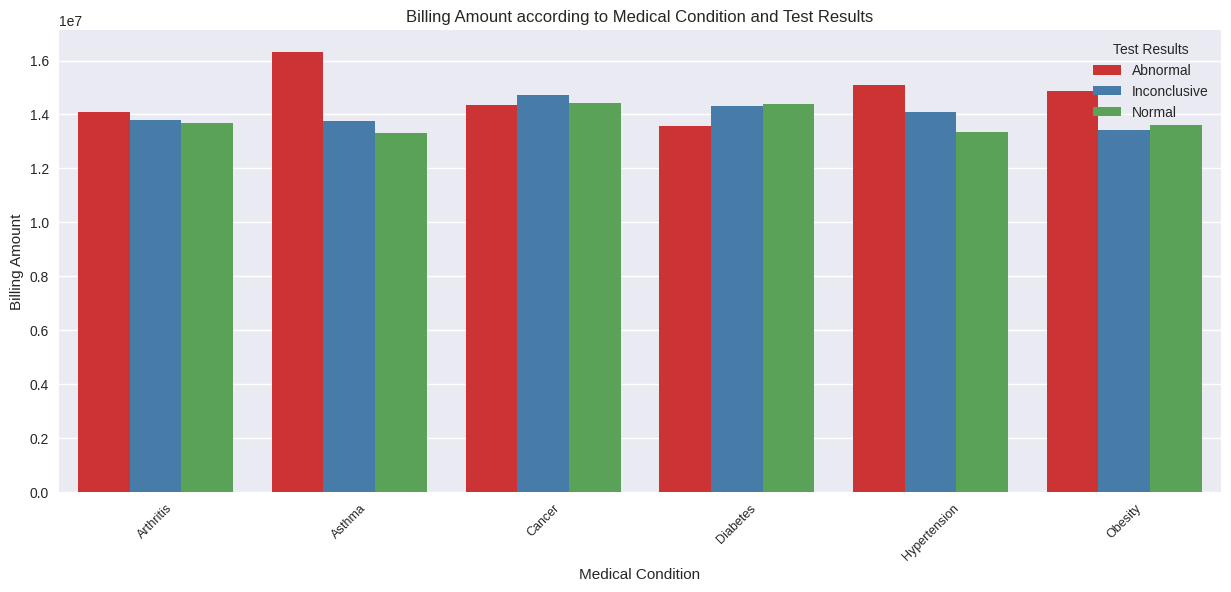

In [8]:
# Tạo DataFrame mới bằng cách nhóm dữ liệu theo cặp cột 'Medical Condition' và 'Test Results',
# tính tổng 'Billing Amount' trong mỗi nhóm và reset index
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

# Tạo biểu đồ cột thể hiện 'Billing Amount' theo 'Medical Condition' và 'Test Results',
# sử dụng màu sắc khác nhau cho từng giá trị trong 'Test Results'
plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
# Đặt tiêu đề biểu đồ
plt.title("Billing Amount according to Medical Condition and Test Results")
# Đặt tên trục y
plt.ylabel("Billing Amount")
# Xoay nhãn trục x và đặt kích thước font
plt.xticks(rotation=45, fontsize=9)
# Hiển thị biểu đồ
plt.show()

In [10]:
# Chuyển đổi 'Date of Admission' và 'Discharge Date' sang kiểu datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Tính 'Days hospitalized' là sự chênh lệch thời gian
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14 days
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14 days
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30 days
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1 days
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24 days


In [11]:
# Tính trung bình số ngày nhập viện cho mỗi thuộc tính, loại bỏ 'Days hospitalized'
cols = df.columns

for i in cols:
    if i == 'Days hospitalized':
        # Bỏ qua cột 'Days hospitalized'
        continue

    # Tính trung bình số ngày nhập viện cho từng giá trị trong cột 'i'
    char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

    top = char_bar.head(10)
    fig = go.Figure(go.Bar(x=top[i], y=top['Days hospitalized']))

    fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                      xaxis_title=i,
                      yaxis_title="Days hospitalized",
                      plot_bgcolor='black',
                      paper_bgcolor='gray',
                      font=dict(color='white'))

    # Hiển thị biểu đồ bằng pio trong Colab
    pio.show(fig, renderer="colab")

<ipython-input-13-6e586494a6de>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

<ipython-input-13-6e586494a6de>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-13-6e586494a6de>:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-13-6e586494a6de>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

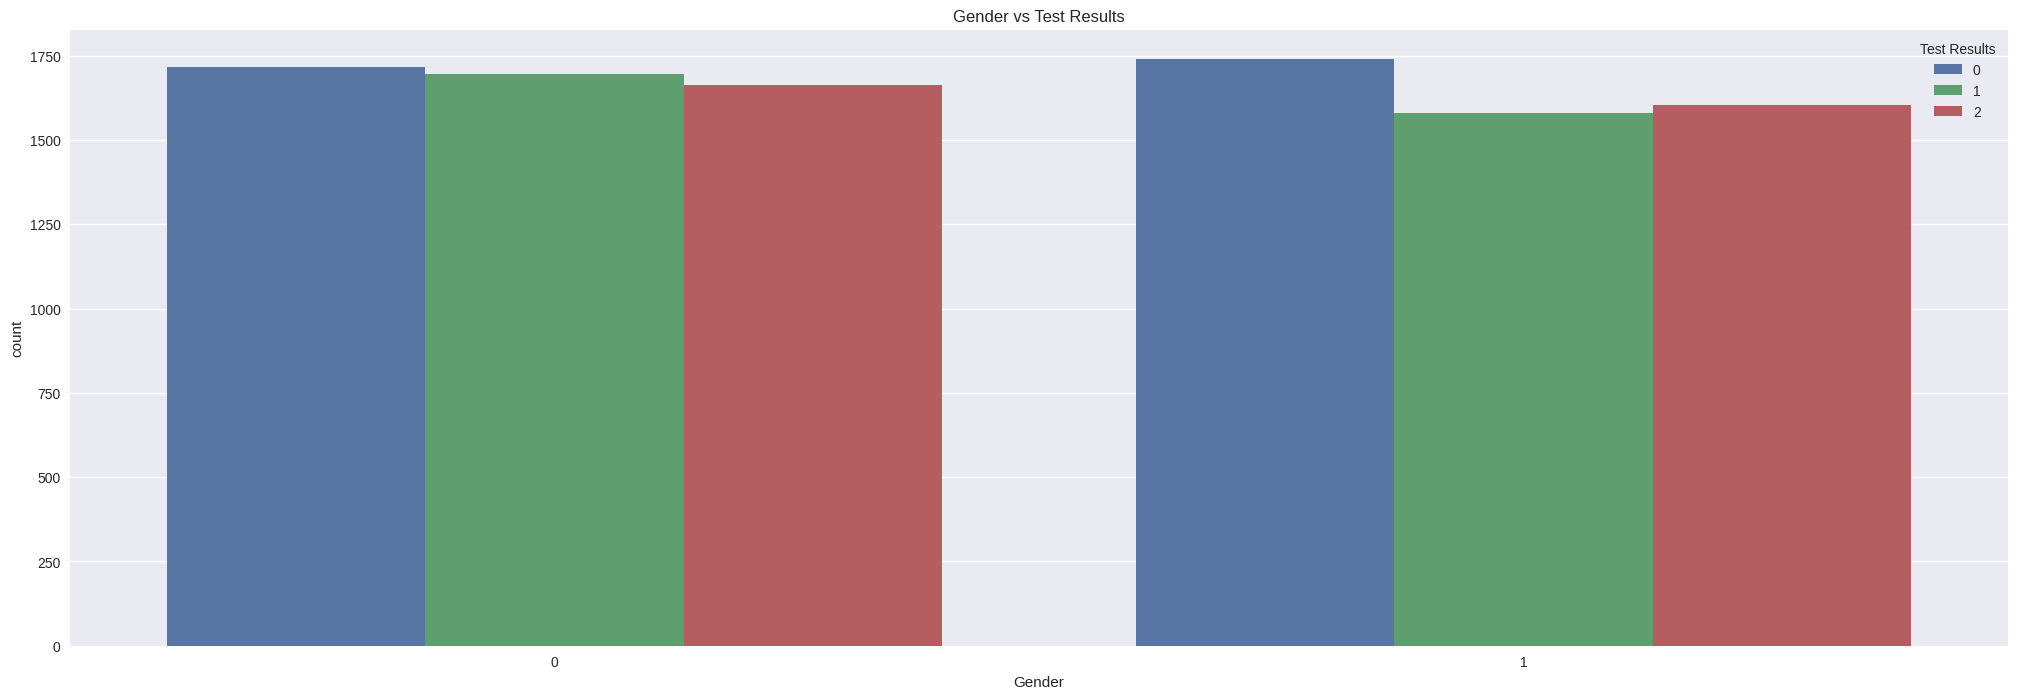

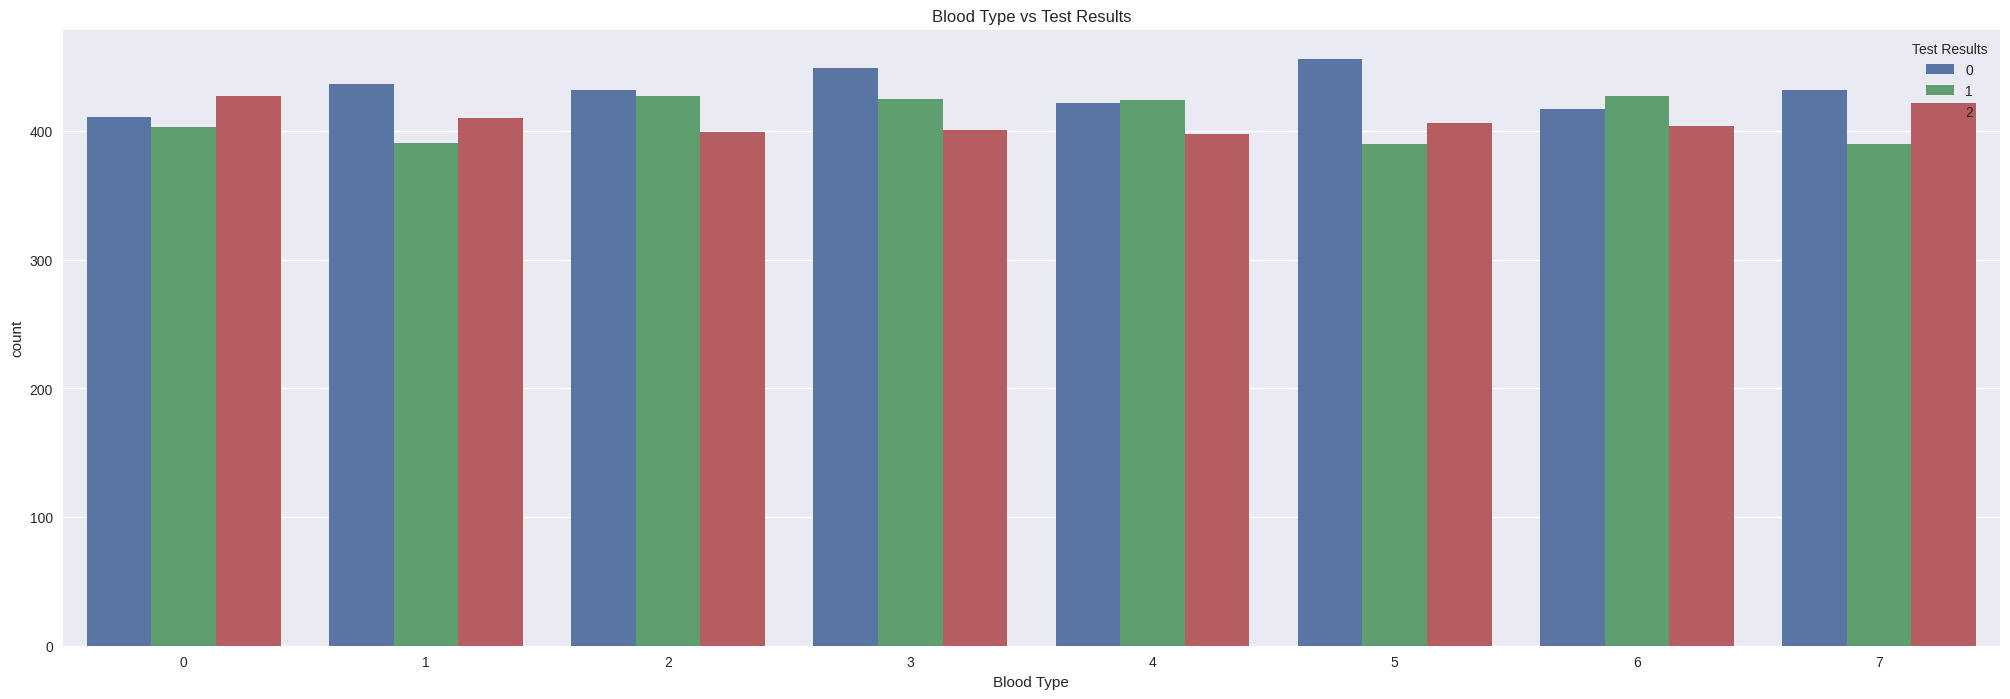

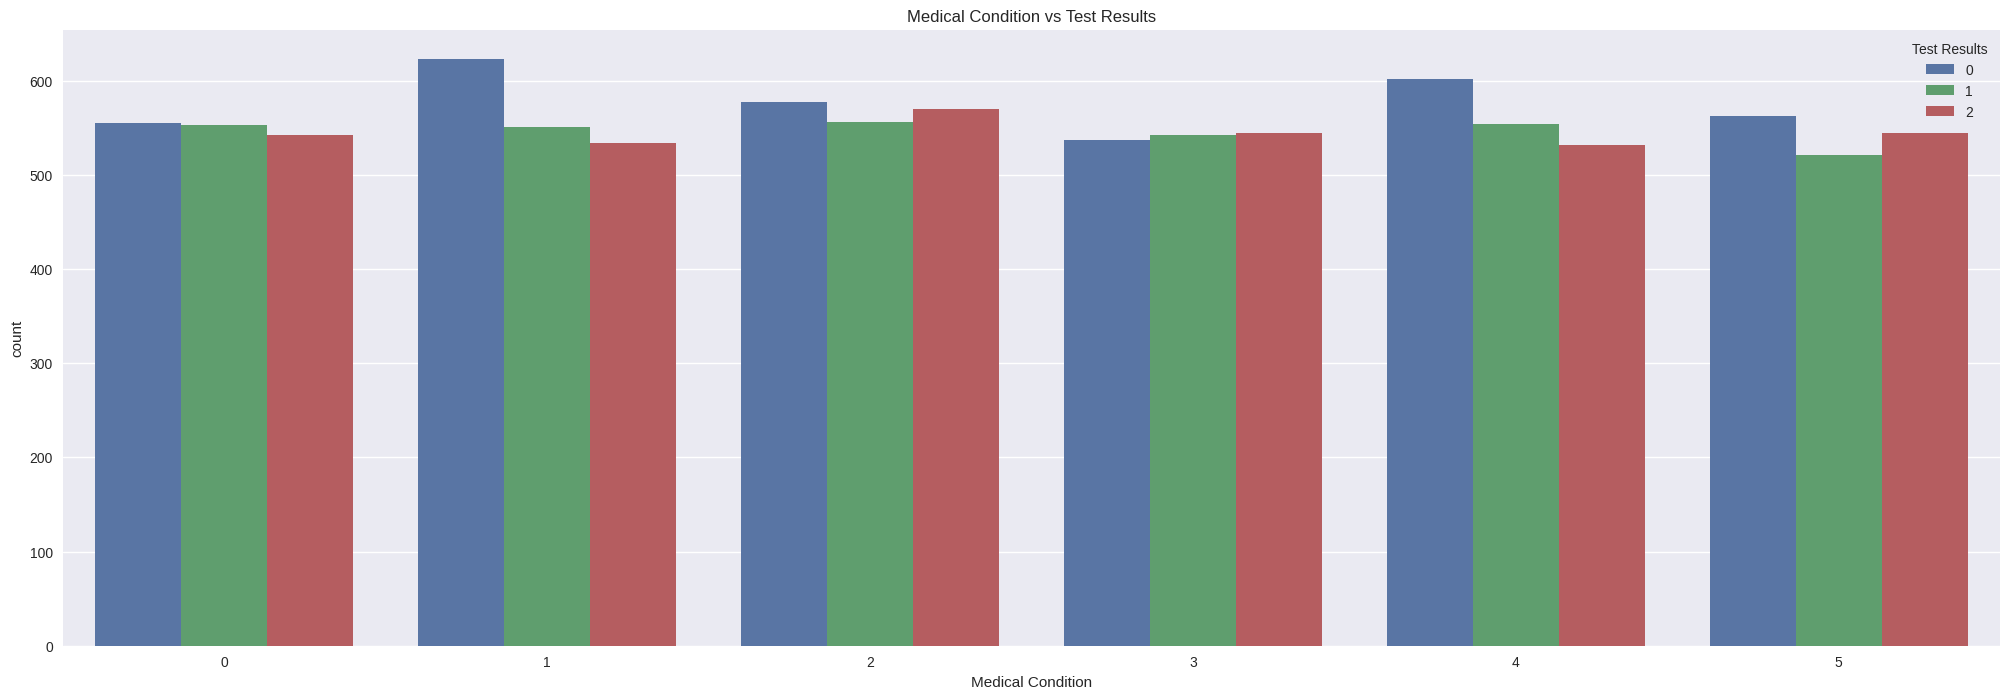

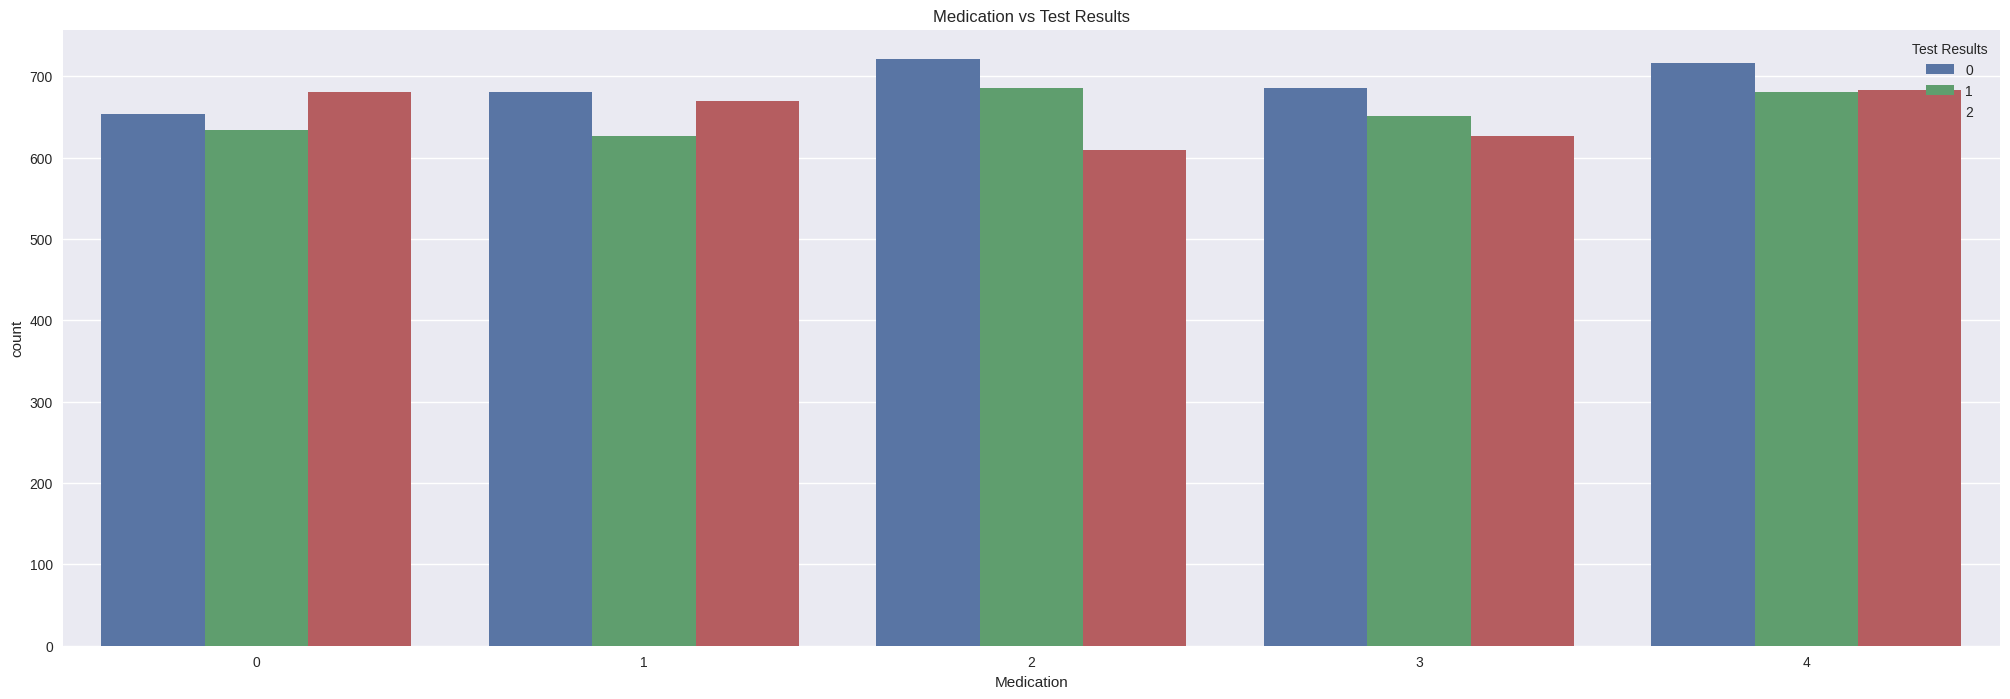

In [13]:
# Thay thế giá trị thiếu bằng giá trị trung bình cho các cột số
df.fillna(df.mean(), inplace=True)

# Chọn các cột có liên quan và biến cố mục tiêu
selected_columns = [ 'Gender','Blood Type', 'Medical Condition',
        'Medication', 'Test Results']
data_for_plot = df[selected_columns]

# Chuyển đổi dữ liệu văn bản thành dữ liệu số bằng LabelEncoder
le = LabelEncoder()
for column in data_for_plot.select_dtypes(include=['object']).columns:
    data_for_plot[column] = le.fit_transform(data_for_plot[column])

# Trực quan hóa mỗi thuộc tính so với 'Test Results' bằng countplot
for column in data_for_plot.columns[:-1]:  # Loại bỏ 'Test Results'
    plt.figure(figsize=(25, 8))
    sns.countplot(x=column, hue='Test Results', data=data_for_plot)
    plt.title(f'{column} vs Test Results')
    plt.show()


<ipython-input-18-ea7e5b5c4274>:4: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

<ipython-input-18-ea7e5b5c4274>:4: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-18-ea7e5b5c4274>:4: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

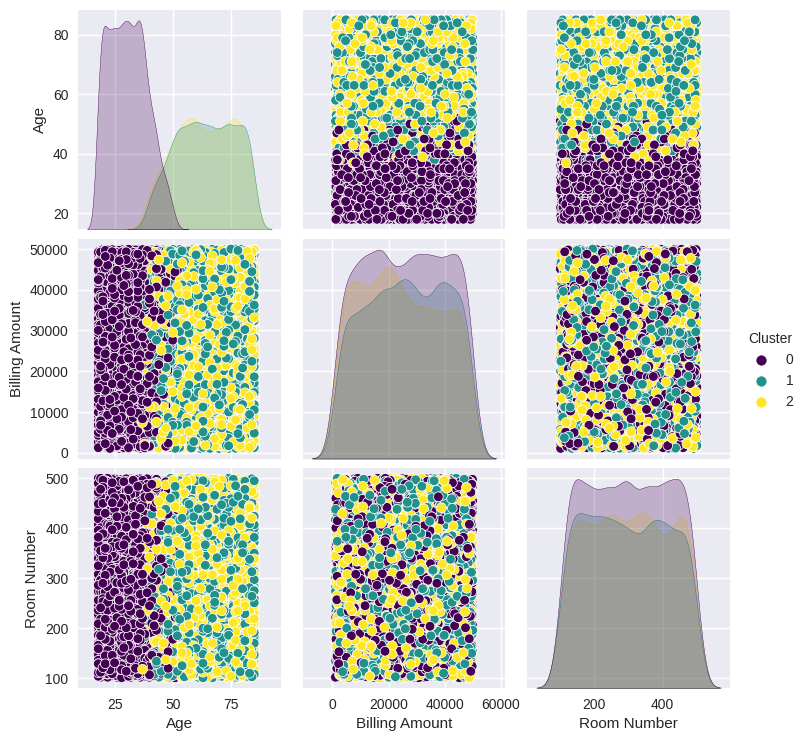

In [18]:
# Thuật toán phân cụm

# Thay thế giá trị thiếu bằng giá trị trung bình cho các cột số
df.fillna(df.mean(), inplace=True)

# Chọn các cột số có liên quan để thực hiện phân cụm (loại bỏ 'Test Results' và 'Days hospitalized')
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns[(numeric_columns != 'Test Results') & (numeric_columns != 'Days hospitalized')]
X = df[numeric_columns]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng thuật toán phân cụm K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

# Thêm cột 'Cluster' vào DataFrame
df['Cluster'] = kmeans.labels_

# Loại bỏ cột 'Days hospitalized'
df.drop('Days hospitalized', axis=1, inplace=True)

# Trực quan hóa kết quả phân cụm
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

Cluster 0 Statistics for Gender:
count       3792
unique         2
top       Female
freq        1920
Name: Gender, dtype: object


Cluster 1 Statistics for Gender:
count       3089
unique         2
top       Female
freq        1552
Name: Gender, dtype: object


Cluster 2 Statistics for Gender:
count       3119
unique         2
top       Female
freq        1603
Name: Gender, dtype: object




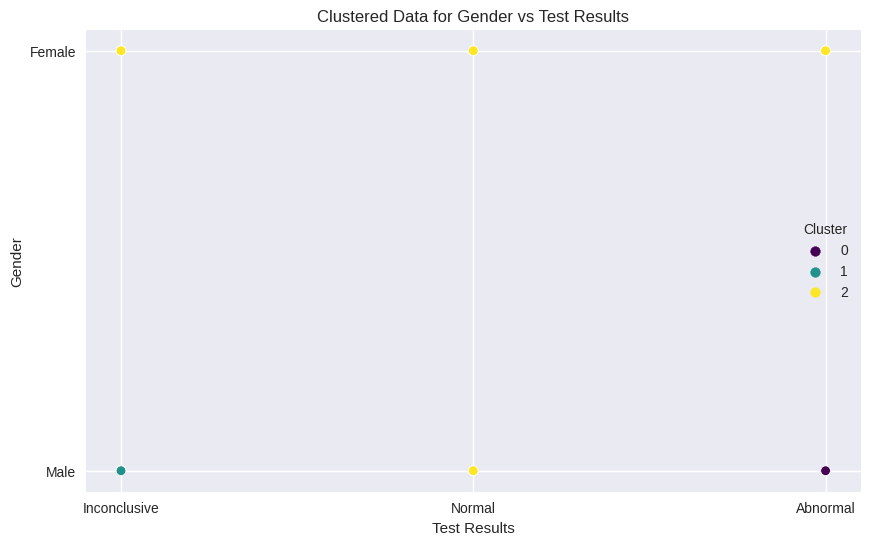

Cluster 0 Statistics for Blood Type:
count     3792
unique       8
top         B-
freq       495
Name: Blood Type, dtype: object


Cluster 1 Statistics for Blood Type:
count     3089
unique       8
top         O-
freq       404
Name: Blood Type, dtype: object


Cluster 2 Statistics for Blood Type:
count     3119
unique       8
top         B+
freq       416
Name: Blood Type, dtype: object




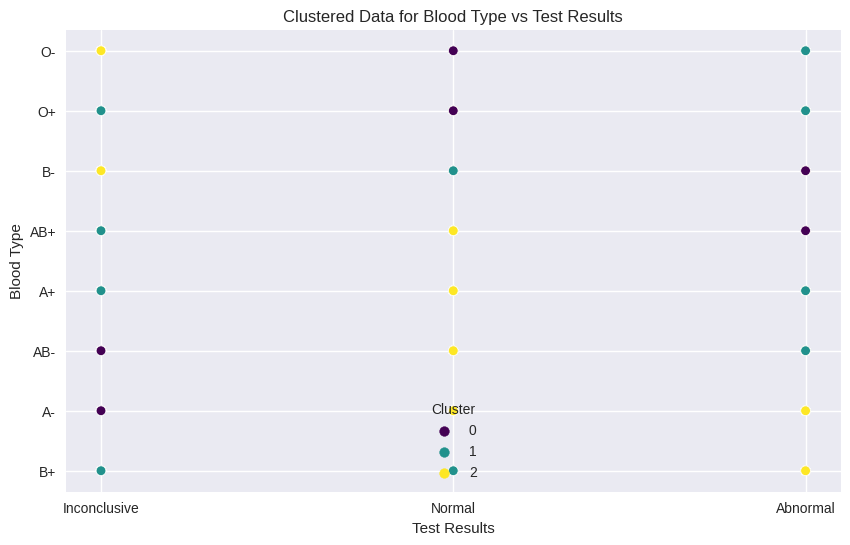

Cluster 0 Statistics for Medical Condition:
count             3792
unique               6
top       Hypertension
freq               662
Name: Medical Condition, dtype: object


Cluster 1 Statistics for Medical Condition:
count       3089
unique         6
top       Cancer
freq         528
Name: Medical Condition, dtype: object


Cluster 2 Statistics for Medical Condition:
count       3119
unique         6
top       Asthma
freq         540
Name: Medical Condition, dtype: object




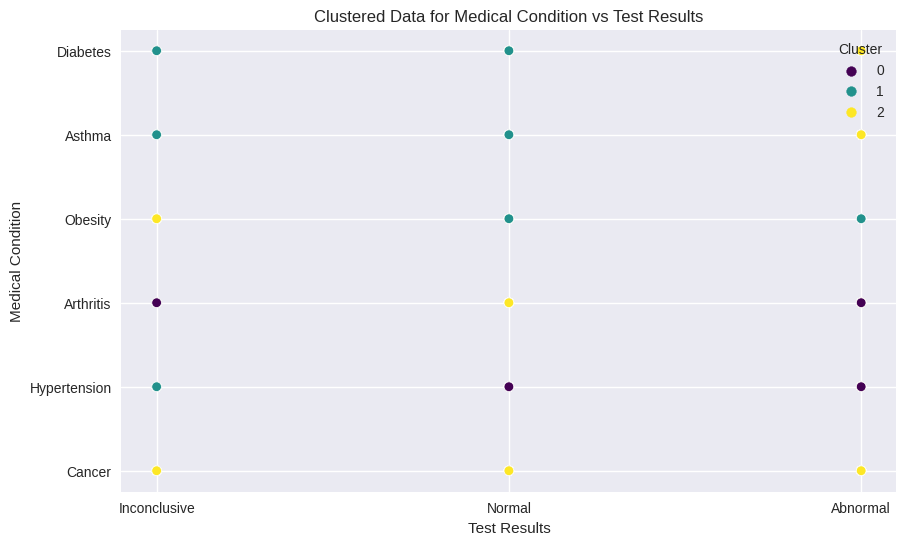

Cluster 0 Statistics for Medication:
count           3792
unique             5
top       Penicillin
freq             775
Name: Medication, dtype: object


Cluster 1 Statistics for Medication:
count        3089
unique          5
top       Aspirin
freq          644
Name: Medication, dtype: object


Cluster 2 Statistics for Medication:
count           3119
unique             5
top       Penicillin
freq             682
Name: Medication, dtype: object




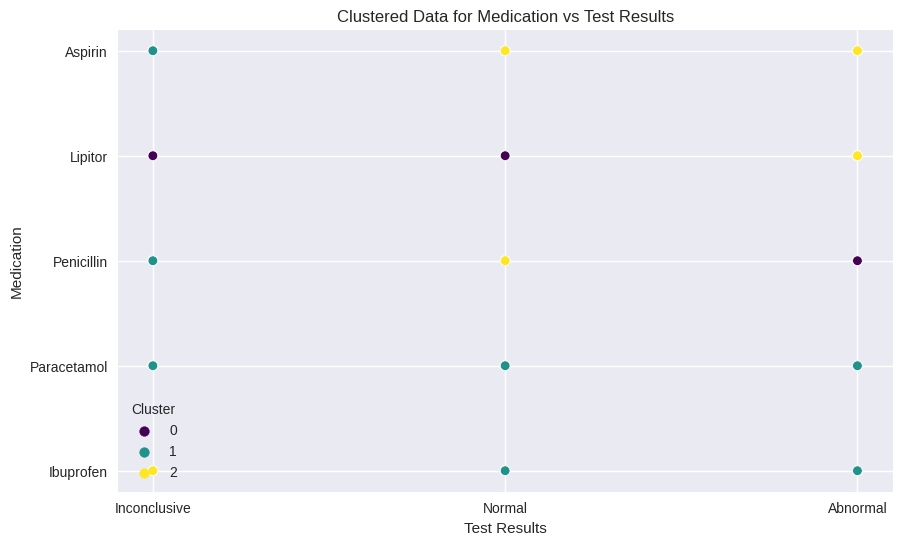

In [19]:
data_for_plot = df[selected_columns]
# Khám phá dữ liệu trong từng cụm cho từng cột với 'Test Results'
for column in selected_columns[:-1]:  # Loại bỏ 'Test Results' vì nó là biến độc lập
    plt.figure(figsize=(10, 6))

    # Thống kê cơ bản cho từng cụm
    for cluster_id in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster_id]
        cluster_stats = cluster_data[column].describe()

        print(f"Cluster {cluster_id} Statistics for {column}:")
        print(cluster_stats)
        print("\n")

    # Trực quan hóa cụm cho từng cột với 'Test Results'
    sns.scatterplot(data=df, x='Test Results', y=column, hue='Cluster', palette='viridis')

    # Đặt tên cho trục và tiêu đề
    plt.xlabel('Test Results')
    plt.ylabel(column)
    plt.title(f'Clustered Data for {column} vs Test Results')

    # Hiển thị biểu đồ
    plt.show()

In [20]:
#Thuật toán Naive Bayes

# Loại bỏ các hàng có giá trị thiếu
df.dropna(inplace=True)
columns = ['Gender','Blood Type', 'Medical Condition',
        'Medication', 'Test Results']
# Tách dữ liệu thành đặc trưng (X) và biến mục tiêu (y)
X = df[columns]
y = df['Test Results']

# Chuyển đổi dữ liệu văn bản thành dữ liệu số bằng LabelEncoder
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-20-02bb27e7f9a0>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-02bb27e7f9a0>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-02bb27e7f9a0>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-02bb

In [21]:
# Huấn luyện mô hình Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Thực hiện tinh chỉnh tham số alpha
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]
for alpha in alphas:
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    print(f'Alpha = {alpha}, Naive Bayes Accuracy: {accuracy_nb}')

# Chọn alpha có độ chính xác cao nhất để huấn luyện mô hình
best_alpha = alphas[np.argmax(accuracy_nb)]

# Huấn luyện mô hình với alpha tốt nhất
nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# In ra độ chính xác và báo cáo phân loại cuối cùng
accuracy_nb_final = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Final Accuracy: {accuracy_nb_final}')
print('Naive Bayes Final Classification Report:')
print(classification_report(y_test, y_pred_nb))

Alpha = 0.1, Naive Bayes Accuracy: 0.8655
Alpha = 0.5, Naive Bayes Accuracy: 0.8655
Alpha = 1.0, Naive Bayes Accuracy: 0.8655
Alpha = 1.5, Naive Bayes Accuracy: 0.8655
Alpha = 2.0, Naive Bayes Accuracy: 0.8655
Naive Bayes Final Accuracy: 0.8655
Naive Bayes Final Classification Report:
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       706
Inconclusive       0.79      0.78      0.79       636
      Normal       0.79      0.81      0.80       658

    accuracy                           0.87      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.87      0.87      2000

